In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.features import *
import pandas as pd
from IPython.display import display


In [2]:

#gis = GIS(username='izaslavsky_ucsd')  # this will ask for password. 
print("Enter the Client ID/APP ID generated from Arc GIS:")
app_id = input()
gis = GIS("https://ucsdonline.maps.arcgis.com/home", client_id=app_id)
arcgis.__version__
# Elm5V3upnnV17Q3r

Enter the Client ID/APP ID generated from Arc GIS:


 Elm5V3upnnV17Q3r


Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://ucsdonline.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=Elm5V3upnnV17Q3r&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=qpPsjne5bp5YADDFFjphQ3KeLjWjL1&allow_verification=false


Enter code obtained on signing in using SAML:  ········


/Users/amolkale/Documents/DSE/DSE260-Capstone-Project/capstone/venv3.9/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ucsdonline.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


'2.1.0'

In [3]:
def get_feature_layer(service_url):
    return FeatureLayer(url=service_url,gis=gis)

In [4]:
def explore_feature_layer(feature_layer):
    
    print(f'Layer Name: {feature_layer.properties.name}')
    print(f'\tCopyright Text: {feature_layer.properties.copyrightText}')
    
    # one of the properties to check serviceItemId
    print(f'\tserviceItemId: {feature_layer.properties.serviceItemId}')
    
    print(f'\tDescription: {feature_layer.properties.description}')
    
    # what operations are possible over this layer ?
    print(f'\tCapabalities: {feature_layer.properties.capabilities}')
    
    # How can we determine CRS of a layer (called "spatial_reference"). 

    # By converting it to a featureset - using query() without parameters -  and then retrieving its spatial reference
    # note that "spatial reference" is a property of a featureset, but not of a layer


    feature_set = feature_layer.query()
    print(f'\tType of feature set: {type(feature_set)}')
    print(f'\tSpatial Reference for the Feature Layer: {feature_set.spatial_reference}')
    print('\tSample Records from the layer:-')
    feature_layer_spatial_df = feature_set.sdf
    print(f'\tTotal Records: {len(feature_layer_spatial_df)}')
    display(feature_layer_spatial_df.head(4))

##### Exploring some other Feature Layer which is already present in UCSDOnline

In [5]:
# Let's check 
explore_feature_layer(get_feature_layer(service_url='https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/PrivateOwnedVacantUndeveloped_SanDiegoCounty_2019/FeatureServer/0'))

Layer Name: PrivateOwnedVacantUndeveloped_SanDiegoCounty_2019
	Copyright Text: H-HUB at UC San Diego
SANDAG, Data Solutions Division
Data, Analytics and Modeling Department
	serviceItemId: 2fcb4ad8fca84454aafba971782c3f72
	Description: <DIV STYLE="text-align:Left;"><DIV><DIV><DIV STYLE="font-size:12pt"><P><SPAN>Layer was created by referencing SANGIS/SANDAG's Current Land Use layer (2019) and Land Ownership (2019). Parcels that were categorized as vacant/undeveloped were selected if they were within or are parcels that did not delineate any owners (assumed as private property).</SPAN></P><P><SPAN /></P><P><SPAN>SANDAG performs an annual land use and housing unit inventory in the interest of maintaining a robust and accurate catalog of the existing conditions for any given year. This catalog of snapshots are the base year inputs to SANDAG’s Regional Demographic, Economic, and Land Use Models. Prior to performing our annual inventory, the polygon geometry for the regionwide layer is upda

Exception: Your request has timed out.
(Error Code: 504)

In [6]:
# Exploring breweries features:
explore_feature_layer(get_feature_layer('https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/Brewery_Locations_in_San_Diego_WFL1/FeatureServer/0'))

Layer Name: Community_Points
	Copyright Text: 
	serviceItemId: e435c0dd31c3447db9503272edf7abf0
	Description: Community_Points
	Capabalities: Query
	Type of feature set: <class 'arcgis.features.feature.FeatureSet'>
	Spatial Reference for the Feature Layer: {'wkid': 102100, 'latestWkid': 3857}
	Sample Records from the layer:-
	Total Records: 177


,FID,COMMUNITY,SHAPE
0,1,Mission Bay Park,"{""points"": [[-13048064.9721881, 3865355.478422..."
1,2,Talmadge,"{""points"": [[-13034435.8036788, 3863301.786055..."
2,3,Mission Valley West,"{""points"": [[-13044335.6135952, 3863972.882063..."
3,4,North Park,"{""points"": [[-13039251.3320859, 3861537.064216..."


In [7]:
service_url = 'https://services1.arcgis.com/eGSDp8lpKe5izqVc/arcgis/rest/services/sandag_census_block_groups/FeatureServer/0'

In [8]:
#SANDAG census block groups layer 
sd_bg_boundaries_feature_layer = get_feature_layer(service_url=service_url)

In [9]:
explore_feature_layer(sd_bg_boundaries_feature_layer)

Layer Name: sandag_census_block_groups
	Copyright Text: 
	serviceItemId: d2bcaed179324f2ca6061172cdd66ab7
	Description: 
	Capabalities: Query
	Type of feature set: <class 'arcgis.features.feature.FeatureSet'>
	Spatial Reference for the Feature Layer: {'wkid': 102100, 'latestWkid': 3857}
	Sample Records from the layer:-
	Total Records: 1794


,FID,OBJECTID,CTBLOCKGRO,CT,BLOCKGROUP,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,1001,100,1,6681219.411387,15859.711771,880044.207031,5755.742638,"{""rings"": [[[-13045373.0245459, 3863378.855160..."
1,2,2,1002,100,2,9886056.59993,18009.236719,1302113.480469,6534.817965,"{""rings"": [[[-13045398.5344079, 3863208.089962..."
2,3,3,2011,201,1,8250527.564342,11853.222287,1086741.710938,4301.72955,"{""rings"": [[[-13043465.8865252, 3863221.674069..."
3,4,4,2021,202,1,4319103.262502,12043.278905,568776.804688,4370.04466,"{""rings"": [[[-13043560.4265136, 3862026.868732..."


<Item title:"sandag_census_block_groups" type:Feature Layer Collection owner:akale_UCSDOnline>
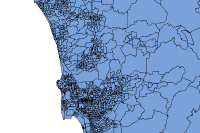

In [10]:
# explore the same from AGOL UI:
gis.content.get('d2bcaed179324f2ca6061172cdd66ab7')

In [11]:
def query_feature_layer(query_expression,feature_layer):
    arcgis.features.find_locations.find_existing_locations(input_layers=[feature_layer],expressions=query_expression)
    

In [12]:
block_grp_expr = {"operator":"and","layer":0,"where":"CTBLOCKGROUP = '192,071'"}

In [13]:
block_grp_spatial_query = {
"operator": "and",
"layer": 0,
"spatialRel": "withinDistance",
"selectingLayer": 0,
"distance": 10,
"units": "miles"
}

In [14]:
#query_feature_layer(block_grp_expr,sd_bg_boundaries_feature_layer)

In [15]:
# Try it for feature layer hosted with SANDAG
#query_feature_layer(block_grp_expr,get_feature_layer(service_url='https://gissd.sandag.org/rdw/rest/services/Census/Census_ZIP/MapServer/2'))



#### Query the Feature layer

In [16]:
sd_bg_boundaries_feature_layer.properties.serviceItemId

'd2bcaed179324f2ca6061172cdd66ab7'

In [17]:
record_name = '1001'  # name to search
out_fields = ["CTBLOCKGRO", "CT", "BLOCKGROUP"]  # fields to return
where = f"CTBLOCKGRO = {record_name}"

In [18]:
where

'CTBLOCKGRO = 1001'

In [20]:
record_row = sd_bg_boundaries_feature_layer.query(
    where=where,
    out_fields=out_fields
).sdf

record_row

,FID,CTBLOCKGRO,CT,BLOCKGROUP,SHAPE
0,1,1001,100,1,"{""rings"": [[[-13045373.0245459, 3863378.855160..."


In [21]:
featureset = sd_bg_boundaries_feature_layer.query()

In [22]:
featureset.fields

[{'name': 'FID',
  'type': 'esriFieldTypeOID',
  'alias': 'FID',
  'sqlType': 'sqlTypeInteger',
  'domain': None,
  'defaultValue': None},
 {'name': 'OBJECTID',
  'type': 'esriFieldTypeSmallInteger',
  'alias': 'OBJECTID',
  'sqlType': 'sqlTypeSmallInt',
  'domain': None,
  'defaultValue': None},
 {'name': 'CTBLOCKGRO',
  'type': 'esriFieldTypeInteger',
  'alias': 'CTBLOCKGRO',
  'sqlType': 'sqlTypeInteger',
  'domain': None,
  'defaultValue': None},
 {'name': 'CT',
  'type': 'esriFieldTypeInteger',
  'alias': 'CT',
  'sqlType': 'sqlTypeInteger',
  'domain': None,
  'defaultValue': None},
 {'name': 'BLOCKGROUP',
  'type': 'esriFieldTypeSmallInteger',
  'alias': 'BLOCKGROUP',
  'sqlType': 'sqlTypeSmallInt',
  'domain': None,
  'defaultValue': None},
 {'name': 'ShapeSTAre',
  'type': 'esriFieldTypeDouble',
  'alias': 'ShapeSTAre',
  'sqlType': 'sqlTypeFloat',
  'domain': None,
  'defaultValue': None},
 {'name': 'ShapeSTLen',
  'type': 'esriFieldTypeDouble',
  'alias': 'ShapeSTLen',
  'sq

In [23]:
sd_bg_boundaries_feature_layer.query(where="CTBLOCKGRO = '1001'",out_fields=["CTBLOCKGRO"]).sdf

,FID,CTBLOCKGRO,SHAPE
0,1,1001,"{""rings"": [[[-13045373.0245459, 3863378.855160..."


In [24]:
sd_bg_boundaries_feature_layer.query(where="CTBLOCKGRO = '1001'").sdf

,FID,OBJECTID,CTBLOCKGRO,CT,BLOCKGROUP,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,1001,100,1,6681219.411387,15859.711771,880044.207031,5755.742638,"{""rings"": [[[-13045373.0245459, 3863378.855160..."


In [25]:
featureset.sdf

,FID,OBJECTID,CTBLOCKGRO,CT,BLOCKGROUP,ShapeSTAre,ShapeSTLen,Shape__Area,Shape__Length,SHAPE
0,1,1,1001,100,1,6681219.411387,15859.711771,880044.207031,5755.742638,"{""rings"": [[[-13045373.0245459, 3863378.855160..."
1,2,2,1002,100,2,9886056.59993,18009.236719,1302113.480469,6534.817965,"{""rings"": [[[-13045398.5344079, 3863208.089962..."
2,3,3,2011,201,1,8250527.564342,11853.222287,1086741.710938,4301.72955,"{""rings"": [[[-13043465.8865252, 3863221.674069..."
3,4,4,2021,202,1,4319103.262502,12043.278905,568776.804688,4370.04466,"{""rings"": [[[-13043560.4265136, 3862026.868732..."
4,5,5,2022,202,2,3348465.343567,9276.109036,440992.289062,3365.580506,"{""rings"": [[[-13044064.8153232, 3862217.598105..."
...,...,...,...,...,...,...,...,...,...,...
1789,1790,1790,220001,22000,1,3974201.050908,10313.6487,522644.226562,3739.037497,"{""rings"": [[[-13034367.549584, 3853507.5518652..."
1790,1791,1791,220002,22000,2,4402106.014903,9456.429688,578825.335938,3431.410906,"{""rings"": [[[-13033690.9494303, 3852217.666941..."
1791,1792,1792,221001,22100,1,134212538.432881,53537.685684,17830867.625,19501.337886,"{""rings"": [[[-13057399.5599429, 3915123.065531..."
1792,1793,1793,221002,22100,2,36550523.200048,32222.242963,4854332.558594,11739.772297,"{""rings"": [[[-13054134.336033, 3911221.9159382..."


In [26]:
# From webmaps.sandiego.gov San Diego Communities
explore_feature_layer(get_feature_layer(service_url='https://webmaps.sandiego.gov/arcgis/rest/services/SD_Sidewalks_v5/MapServer/12'))

Layer Name: Communities
	Copyright Text: City of San Diego, Planning Department
	serviceItemId: 5d202b61e047494d8402bb541cd210d3
	Description: Community plan boundaries for the City of San Diego land use policy plans specific to these geographic areas. Land use policies within jurisdictional boundaries have the ability to create a citywide land use and policy document called the General Plan. Many cities in California are small enough that their General Plans are single volumes. Larger cities, such as San Diego, often subdivide the city into a number of community plans, or "mini" land use policy plans for more specific geographic areas.
	Capabalities: Map,Query,Data
	Type of feature set: <class 'arcgis.features.feature.FeatureSet'>
	Spatial Reference for the Feature Layer: {'wkid': 102646, 'latestWkid': 2230}
	Sample Records from the layer:-
	Total Records: 63


,OBJECTID,CPCODE,CPNAME,ACREAGE,Shape_STAr,Shape_STLe,OBJECTID_1,Shape_Length,Shape_Area,SHAPE
0,1,37.0,"SOUTHEASTERN SAN DIEGO,SOUTHEASTERN",2928.980564,127586393.391,62401.141743,1,62401.142359,127586393.998232,"{""rings"": [[[6299335.573509052, 1842145.088913..."
1,2,97.0,MILITARY FACILITIES,444.216478,19350069.7559,31304.013099,2,31304.012715,19350069.843836,"{""rings"": [[[6292102.003750384, 1832996.009085..."
2,3,25.0,OTAY MESA-NESTOR,5367.820835,233822275.519,95210.708583,3,95210.708387,233822274.788668,"{""rings"": [[[6295505.4736445695, 1801168.19906..."
3,4,26.0,OTAY MESA,9316.129163,405811314.098,105906.774574,4,105906.77455,405811316.136828,"{""rings"": [[[6324392.343625978, 1795734.959091..."


In [27]:
# From webmaps.sandiego.gov San Diego Counsil Districts
explore_feature_layer(get_feature_layer(service_url='https://webmaps.sandiego.gov/arcgis/rest/services/SD_Sidewalks_v5/MapServer/11'))

Layer Name: Council Districts
	Copyright Text: City of San Diego
	serviceItemId: 5d202b61e047494d8402bb541cd210d3
	Description: On August 25, 2011, the Redistricting Commission of the City of San Diego voted 7-0 to adopt the Final Redistricting Plan, which specifies the boundaries of districts for San Diego City Council. The Final Plan complies with the redistricting criteria and legal requirements of San Diego City Charter sections 5 and 5.1; the U.S. Constitution; the federal Voting Rights Act of 1965; and related cases and statutes. The Redistricting Commission also added a 9th Council District, as directed by the voters of the City of San Diego in a Charter amendment enacted in 2010. The Redistricting Commission of the City of San Diego is vested with sole and exclusive authority to adopt plans that specify the boundaries of districts for San Diego City Council. San Diego City Charter sections 5 and 5.1 were enacted by the voters in 1992 to create an independent Redistricting Commi

,OBJECTID_1,OBJECTID,DISTRICT,PHONE,WEBSITE,PERIMETER,AREA,Shape_STAr,Shape_STLe,OBJECTID_12,Shape_Length,Shape_Area,SHAPE
0,1.0,1,1.0,(619) 236-6611,http://www.sandiego.gov/citycouncil/cd1/index....,249608.621107,1298260375.36,1298260375.37,249608.621107,1,249608.621107,1298260375.363319,"{""rings"": [[[6250677.896486506, 1874134.378356..."
1,2.0,2,2.0,(619) 236-6622,http://www.sandiego.gov/citycouncil/cd2/index....,235764.574688,1071351044.4,1071351044.41,235764.574688,2,235764.574688,1071351044.401846,"{""rings"": [[[6278620.431152508, 1838503.230130..."
2,3.0,3,3.0,(619) 236-6633,http://www.sandiego.gov/citycouncil/cd3/index....,123627.108763,416385033.793,416385033.794,123627.108763,3,123627.108763,416385033.793338,"{""rings"": [[[6278916.697620347, 1838454.854899..."
3,4.0,4,4.0,(619) 236-6644,http://www.sandiego.gov/citycouncil/cd4/index....,142771.667643,479647101.512,479647101.51,142771.667643,4,142771.667643,479647101.511649,"{""rings"": [[[6315499.381344587, 1855477.991128..."
